In [112]:
import pandas as pd

In [113]:
path='C:/Users\dmckenzie\BigRoomContentsCluster2.csv'

In [114]:
DATIS=pd.read_csv(path)

In [115]:
import numpy as np

In [116]:
DATIS['Label2']=np.where(DATIS['FinalFinalLab2']=='tables table wall walls','other',DATIS['FinalFinalLab2'])

In [117]:
DATIS=DATIS.query('FinalFinalLab2SUM>30').reset_index(drop=True)

In [118]:
len(DATIS['Name2'].str.lower().drop_duplicates())

38527

In [119]:
len(DATIS['Label2'].str.lower().drop_duplicates())

569

In [120]:
len(DATIS[DATIS['Label2']!='other'].drop_duplicates(['Name']))

53285

In [121]:
import re
def preprocessor(text): 
    text = re.sub(r'[^\w\s]','', text)
    text = text.lower()
    return text

In [67]:
DATIS['Name'].str.replace('/',' ').replace({' +':' '},regex=True).apply(preprocessor).str.replace('_',' ').replace({' +':' '},regex=True)

0                                          c2c acces panel
1                                     dlrj access pane2x2l
2                                    access control device
3                                        dlrj access panel
4                                 bms access panel generic
                               ...                        
65655                 workstation lshape filefile dlr long
65656               e0117workstation straight freestanding
65657          e0123 workstation straight freestanding 72w
65658                           workstations single office
65659    knoll dividends horizon worksurface curvilinea...
Name: Name, Length: 65660, dtype: object

In [122]:
DATIS['CleanName']=DATIS['Name'].str.replace('/',' ').replace({' +':' '},regex=True).apply(preprocessor).str.replace('_',' ').replace({' +':' '},regex=True)

In [123]:
DATIS['CleanName']=DATIS['Name'].str.replace('/',' ').replace({' +':' '},regex=True).apply(preprocessor)

In [124]:
len(DATIS['Name'].value_counts())-len(DATIS['CleanName'].value_counts())

376

In [125]:
DATIS['NameLen']=DATIS['Name'].str.len()
DATIS['RoomName']=DATIS['Name'].str.lower()
DATIS['TokenCount']=((DATIS['Name'].str.len()-DATIS['Name'].str.replace(' ','').str.len())+1)

<AxesSubplot:>

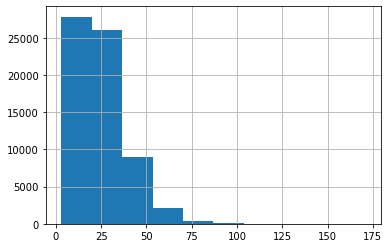

In [126]:
DATIS['NameLen'].hist()

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle

In [128]:
import pandas as pd
import numpy as np
from numpy import random
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [129]:
DATIS.Label2=DATIS.Label2.str.lower()

In [130]:
binomiallist=[]
for i in range(0,len(DATIS)):
        binomiallist.append(np.random.binomial(1, .5))

In [131]:
DATIS['Keep']=binomiallist
DATIS['Keep']=np.where((DATIS['Label2']=='other'),DATIS['Keep'],1)

In [132]:
DATIS[(DATIS['Label2']=='other')]['Keep'].value_counts()

1    5596
0    5564
Name: Keep, dtype: int64

In [133]:
DATIS2=DATIS[DATIS['Keep']==1]

In [134]:
DATIS2['Dummy']=1

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [135]:
len(DATIS2)

60096

In [136]:
DATIS2[['Name','Category','Total']].drop_duplicates()

,Name,Category,Total
0,C2C_Acces Panel,Generic Models,14
1,DLRJ_Access_Pane2x2l,Doors,28
2,Access Control Device,Security Devices,52
3,DLRJ_Access_Panel,Doors,85
4,+BMS_Access Panel_Generic,Generic Models,3
...,...,...,...
65655,Workstation_L-Shape_FileFile_DLR_LONG,Furniture,1
65656,E0117-Workstation straight freestanding,Furniture,12
65657,E0123_workstation straight freestanding 72W,Furniture,12
65658,Workstations_Single Office,Furniture,154


In [137]:
print(len(DATIS2[['Name','Category','Total']].drop_duplicates()))
print(len(DATIS2[['Name','Total']].drop_duplicates()))

60096
59880


In [138]:

from tqdm import tqdm

rowlist=list()

rows=list(DATIS2.reset_index(drop=True).index.values)

for i in tqdm(rows):
    
    multiplier=int(np.where(DATIS2.iloc[[i]]['Total']>50,50,DATIS2.iloc[[i]]['Total']))
    
    rowlist.append(pd.concat([DATIS2.iloc[[i]]]*multiplier))
    

100%|██████████| 60096/60096 [07:56<00:00, 126.23it/s]


In [139]:
DATIS2.reset_index(drop=True).index.values

array([    0,     1,     2, ..., 60093, 60094, 60095], dtype=int64)

In [140]:
DATIS2=pd.concat(rowlist,ignore_index=True)

In [141]:
DATIS2=DATIS2.rename(columns={'Label2':'InputType'})

In [142]:
size = 400        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
DATIS3=DATIS2.groupby('InputType', as_index=False).apply(fn).reset_index(drop=True)

In [143]:
y = DATIS3.InputType.str.lower()

In [144]:
y2=DATIS2.InputType.str.lower()
xx2=DATIS2['Name']

In [145]:
DATIS3['Name'] = DATIS3['CleanName']
DATIS2['Name'] = DATIS2['CleanName']

In [146]:
X = DATIS3['Name']

In [147]:
DATIS3['Name']

0         mod_air_acces panel 1200 x 400
1                access_panels_wall_dlrz
2                  dlr_access_panel_wall
3            vrf access panel_face based
4               dlr_access_panel_louvers
                       ...              
227595                       scanner_dlr
227596                book scanner  door
227597               book scanner  door4
227598                       scanner_dlr
227599                       scanner_dlr
Name: Name, Length: 227600, dtype: object

In [148]:
#DATIS2['ID']=DATIS2.reset_index(drop=True).index.values

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y ,test_size=0.2, random_state = 44)

In [150]:
len(y_train)

182080

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [152]:
#ToScore.to_csv('SpaceProgramClassed.csv')

In [98]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


tfidfvec=TfidfVectorizer(ngram_range=(1,1),max_df=.4,min_df=1,norm='l2',smooth_idf=True,sublinear_tf=False,use_idf=True)
mod=SGDClassifier(penalty='l1',loss='log')

#vectorizer.fit(X_train)
#X_train2=vectorizer.transform(X_train)
#X_test2=vectorizer.transform(X_test)




text_clf = Pipeline([ 
    ('tfidf', tfidfvec),
    ('clf', mod),
])


text_clf.fit(X_train, y_train)

#mod.fit(X_train2, y_train)

from sklearn.metrics import classification_report
#y_pred = mod.predict(X_test2)
y_pred2 = text_clf.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred2, y_test))
#print(classification_report(y_test, y_pred2))


#print('accuracy %s' % accuracy_score(y_pred, y_test))
#print(classification_report(y_test, y_pred))

accuracy 0.7861379613356766


In [103]:
from sklearn.metrics import classification_report
#y_pred = mod.predict(X_test2)
y_pred2 = text_clf.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred2, y_test))
#print(classification_report(y_test, y_pred2))


print('accuracy %s' % accuracy_score(y_pred2, y_test))
print(classification_report(y_test, y_pred2))
crp=classification_report(y_test, y_pred2,output_dict=True)

accuracy 0.7861379613356766
accuracy 0.7861379613356766


C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

                                                            precision    recall  f1-score   support

                                       access panel panels       0.68      0.85      0.76        80
                                accessories accessory bivi       0.75      0.53      0.62        80
                                          accessories duct       1.00      1.00      1.00        80
                acoustic acoustics acoustical panel panels       1.00      0.86      0.93        80
                                             action office       1.00      0.82      0.90        80
                                                admin desk       1.00      0.97      0.99        80
                                           air conditioner       0.70      0.86      0.77        80
                                                air return       0.89      0.81      0.85        80
                                                air supply       0.76      0.68      0.72        80

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [104]:
crpDF=pd.DataFrame(crp).transpose()

In [105]:
crpDF.query('precision<.68').sort_values('precision')

,precision,recall,f1-score,support
aws power,0.000000,0.0000,0.000000,80.0
other,0.000000,0.0000,0.000000,80.0
cpt,0.025237,1.0000,0.049231,80.0
oven burner,0.269663,0.6000,0.372093,80.0
toilet,0.297297,0.4125,0.345550,80.0
...,...,...,...,...
mod light,0.671642,0.5625,0.612245,80.0
shelf,0.672131,0.5125,0.581560,80.0
computer flat screen with keyboard,0.673267,0.8500,0.751381,80.0
toilet tissue dispenser,0.677419,0.7875,0.728324,80.0


0.9090909090909091


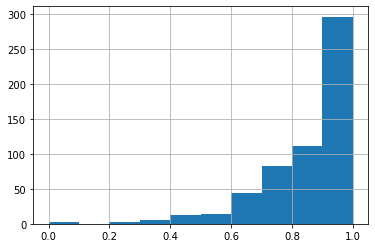

In [106]:
pd.DataFrame(crp).transpose()['precision'].hist()
print(pd.DataFrame(crp).transpose()['precision'].median())

0.8468098350451292


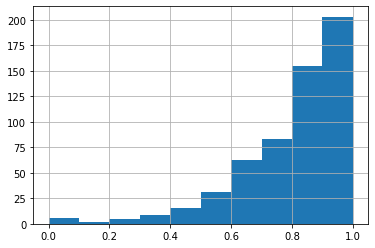

In [107]:
pd.DataFrame(crp).transpose()['f1-score'].hist()
print(pd.DataFrame(crp).transpose()['f1-score'].median())

In [108]:
from sklearn.naive_bayes import *
clf = BernoulliNB()
text_clf2 = Pipeline([ 
    ('tfidf', tfidfvec),
    ('clf', clf),
])


text_clf2.fit(X_train, y_train)

from sklearn.metrics import classification_report
#y_pred = mod.predict(X_test2)
y_pred22 = text_clf2.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred22, y_test))
print(classification_report(y_test, y_pred22))


accuracy 0.9294156414762742


C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                            precision    recall  f1-score   support

                                       access panel panels       1.00      0.95      0.97        80
                                accessories accessory bivi       0.97      0.91      0.94        80
                                          accessories duct       1.00      1.00      1.00        80
                acoustic acoustics acoustical panel panels       1.00      0.97      0.99        80
                                             action office       0.98      1.00      0.99        80
                                                admin desk       0.99      0.97      0.98        80
                                           air conditioner       1.00      0.99      0.99        80
                                                air return       0.96      0.89      0.92        80
                                                air supply       0.95      0.90      0.92        80

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
crp2=classification_report(y_test, y_pred22,output_dict=True)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Median Score: 0.9797959183673469


Room Inputs Predicted With Less Than 80% Precision

                                     precision  recall  f1-score  support
angle angles cane                    0.619048  0.9750  0.757282     80.0
bar holder                           0.458824  0.9750  0.624000     80.0
batten lower                         0.797980  0.9875  0.882682     80.0
bed bunk detention                   0.744898  0.9125  0.820225     80.0
box eef                              0.742857  0.9750  0.843243     80.0
cpt                                  0.057389  1.0000  0.108548     80.0
desk reception                       0.768421  0.9125  0.834286     80.0
int frame                            0.768421  0.9125  0.834286     80.0
joists light                         0.666667  1.0000  0.800000     80.0
other                                0.000000  0.0000  0.000000     80.0
outlet power                         0.782178  0.9875  0.872928     80.0
pendant                             

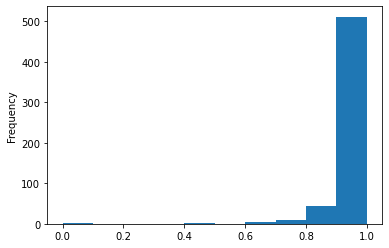

In [110]:
print('Median Score:',pd.DataFrame(crp2).transpose()['precision'].median())
pd.DataFrame(crp2).transpose()['precision'].plot(kind='hist')

print('\n\nRoom Inputs Predicted With Less Than 80% Precision\n\n',pd.DataFrame(crp2).transpose().query('precision<.8'))

In [141]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import StringTensorType
from onnxmltools import save_model
from onnxruntime import InferenceSession

In [142]:
onnx_model = convert_sklearn(text_clf2,
name='ALLInputs',
initial_types=[('input', StringTensorType([1, 1]))]
)

save_model(onnx_model, 'ALLKind.onnx')
sess = InferenceSession("ALLKind.onnx")
label_name = sess.get_outputs()[0].name
input_name = sess.get_inputs()[0].name

#res = sess.run(None, input_feed={'input': np.array([['corridor']])})

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\skl2onnx\operator_converters\text_vectoriser.py:190: UserWarning: Converter for TfidfVectorizer will use scikit-learn regular expression by default in version 1.6.
  UserWarning)
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\skl2onnx\common\_container.py:691: UserWarning: Unable to find operator 'Tokenizer' in domain 'com.microsoft' in ONNX, op_version is forced to 1.
  op_type, domain))


In [176]:
sess.run(None, input_feed={'input': np.array([["chair"]])})


[array(['chair'], dtype=object),
 [{'access panel panels': 0.0012681301450356841,
   'accessories accessory bivi': 0.00026624073507264256,
   'accessories duct': 8.412177265881837e-08,
   'acoustic acoustics acoustical panel panels': 0.00046709596063010395,
   'action office': 0.0030777337960898876,
   'admin desk': 0.00016494728333782405,
   'air conditioner': 0.002351423492655158,
   'air return': 0.00046845569158904254,
   'air supply': 0.00019937923934776336,
   'air unit': 0.00013760742149315774,
   'alarm ceiling': 7.466589158866554e-05,
   'alarm panel': 0.00042129441862925887,
   'aluminum chair': 0.0006184476078487933,
   'alya paw': 0.0030204164795577526,
   'amx decora': 0.0030733461026102304,
   'andreu world': 0.0010533882305026054,
   'angle angles cane': 0.001860597520135343,
   'antenna end': 0.002428528619930148,
   'apron': 0.0001417439489159733,
   'arch': 0.0005111098289489746,
   'arched molding': 9.985222277464345e-06,
   'arm arms chair': 0.001135427039116621,
  

In [174]:
with open("ALLKind.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [178]:
import onnx
onnx_model = onnx.load("ALLKind.onnx")

In [179]:
onnx.checker.check_model(onnx_model)

In [8]:
np.array([1,2])

array([1, 2])

In [4]:
ort_sess.run(None, {'input': np.array([["chair"]])})

TypeError: run() missing 1 required positional argument: 'input_feed'

In [20]:
import onnxruntime as ort
import numpy as np
#x, y = test_data[0][0], test_data[0][1]
ort_sess = ort.InferenceSession('ALLKind.onnx')
outputs = ort_sess.run(None, {'input': np.array([["chair"]])})
#outputs[0][0]

In [21]:
outputs

[array(['chair'], dtype=object),
 [{'access panel panels': 0.0012681301450356841,
   'accessories accessory bivi': 0.00026624073507264256,
   'accessories duct': 8.412177265881837e-08,
   'acoustic acoustics acoustical panel panels': 0.00046709596063010395,
   'action office': 0.0030777337960898876,
   'admin desk': 0.00016494728333782405,
   'air conditioner': 0.002351423492655158,
   'air return': 0.00046845569158904254,
   'air supply': 0.00019937923934776336,
   'air unit': 0.00013760742149315774,
   'alarm ceiling': 7.466589158866554e-05,
   'alarm panel': 0.00042129441862925887,
   'aluminum chair': 0.0006184476078487933,
   'alya paw': 0.0030204164795577526,
   'amx decora': 0.0030733461026102304,
   'andreu world': 0.0010533882305026054,
   'angle angles cane': 0.001860597520135343,
   'antenna end': 0.002428528619930148,
   'apron': 0.0001417439489159733,
   'arch': 0.0005111098289489746,
   'arched molding': 9.985222277464345e-06,
   'arm arms chair': 0.001135427039116621,
  

In [79]:
matchdf=pd.DataFrame({'A':list(y_pred2[X_test.isin(list(X_train))==False]),
              'B':list(y_test[X_test.isin(list(X_train))==False])})

In [80]:
matchdf['C']=(matchdf['A']==matchdf['B'])*1

In [81]:
matchdf['D']=1

In [82]:
labels=list(matchdf.groupby(['A'])['D'].sum().index)

In [83]:
scores=list(matchdf.groupby(['A'])['C'].sum().values/matchdf.groupby(['A'])['D'].sum().values)

In [84]:
print('Accuracy:',matchdf['C'].sum()/matchdf['D'].sum())

Accuracy: 0.8950617283950617


In [85]:
pd.DataFrame({'Category':labels,'Guesses':list(matchdf.groupby(['A'])['D'].sum().values),'True Positive Rate':scores})

,Category,Guesses,True Positive Rate
0,art digital exist,10,0.600000
1,bathroom,32,0.843750
2,classroom,83,0.879518
3,collaboration student work,4,1.000000
4,common social collaboration,11,0.636364
5,conference resource collaboration,6,0.833333
6,corridor mail central,3,0.666667
7,lab exist flex,23,0.782609
8,locker athletic official,13,1.000000
9,mechanical yard auditorium,5,0.800000


C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 728, in fit
    sample_weight=sample_weight)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 541, in _fit
    accept_large_sparse=False)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\dmckenzie\Anaconda3\e

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 728, in fit
    sample_weight=sample_weight)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 541, in _fit
    accept_large_sparse=False)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\dmckenzie\Anaconda3\e

<AxesSubplot:title={'center':'Classifier Validation Score As Training Data Grows'}, xlabel='Training Data Size', ylabel='Validation Score'>

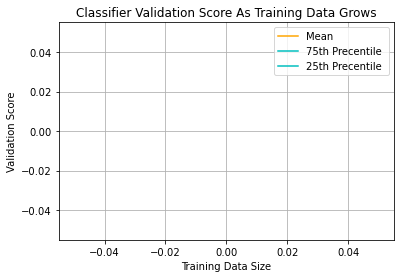

In [39]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

#np.random.seed(0)
#X, y = load_iris(return_X_y=True)
#indices = np.arange(y.shape[0])
#np.random.shuffle(indices)
#X, y = X[indices], y[indices]

train_sizes, train_scores, valid_scores = learning_curve(SGDClassifier(penalty='l1',loss='log',alpha=0.00001),
                                                         X_train, y_train, train_sizes=[10,20,30,40,50,60,70,80,90,100,
                                                                                         110,120,130,140,150,160,170,180,190,200,
                                                                                         210,220,230,240,250,260,270,280,290,300,
                                                                                         310,320,330,340,350,360,370,380,390,400,
                                                                                        410,420,430],cv=5)
pd.DataFrame({'Mean':list(pd.DataFrame(valid_scores.transpose()).median()),
             '75th Precentile ':list(pd.DataFrame(valid_scores.transpose()).quantile(0.75)),
             '25th Precentile':list(pd.DataFrame(valid_scores.transpose()).quantile(0.25))},
             index=train_sizes).plot(color = ['orange', 'c','c'],
                                    xlabel='Training Data Size',ylabel='Validation Score',
                                     grid=True,title='Classifier Validation Score As Training Data Grows')

In [37]:
pd.DataFrame(valid_scores.transpose()).mean().plot()

NameError: name 'valid_scores' is not defined

In [38]:
pd.DataFrame(pd.DataFrame(valid_scores.transpose())).plot()

NameError: name 'valid_scores' is not defined